In [68]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import mplfinance as mpf

In [69]:
# Read the Nasdaq Stock data set
Nasdaq_data = pd.read_csv('Main.csv')
Nasdaq_data.head()

# # It contains Stock Data for the following companies:
    # Apple
    # Amazon
    # Facebook
    # GameStop
    # Google
    # Microsoft
    # MicroStrategy
    # NetFlix
    # NVIDIA
    # Tesla
# It contains Stock Data for the following Years
    # 2015
    # 2016
    # 2017

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Company,Stock
0,12/29/2017,170.52,170.590,169.220,169.23,25643711,0.0,1,170.52,170.590,169.220,169.23,25643711,Apple,AAPL
1,12/28/2017,171.00,171.850,170.480,171.08,15997739,0.0,1,171.00,171.850,170.480,171.08,15997739,Apple,AAPL
2,12/27/2017,170.10,170.780,169.710,170.60,21672062,0.0,1,170.10,170.780,169.710,170.60,21672062,Apple,AAPL
3,12/26/2017,170.80,171.470,169.679,170.57,32968167,0.0,1,170.80,171.470,169.679,170.57,32968167,Apple,AAPL
4,12/22/2017,174.68,175.424,174.500,175.01,16052615,0.0,1,174.68,175.424,174.500,175.01,16052615,Apple,AAPL


In [70]:
# Get the information on the DataFrame
Nasdaq_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7538 entries, 0 to 7537
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         7538 non-null   object 
 1   Open         7538 non-null   float64
 2   High         7538 non-null   float64
 3   Low          7538 non-null   float64
 4   Close        7538 non-null   float64
 5   Volume       7538 non-null   int64  
 6   Ex-Dividend  7538 non-null   float64
 7   Split Ratio  7538 non-null   int64  
 8   Adj. Open    7538 non-null   float64
 9   Adj. High    7538 non-null   float64
 10  Adj. Low     7538 non-null   float64
 11  Adj. Close   7538 non-null   float64
 12  Adj. Volume  7538 non-null   int64  
 13  Company      7538 non-null   object 
 14  Stock        7538 non-null   object 
dtypes: float64(9), int64(3), object(3)
memory usage: 883.5+ KB


# Trend Analysis: Examine the closing prices of each stock over the three-year period to identify trends. You can use simple line charts to visualize upward, downward, or sideways trends.

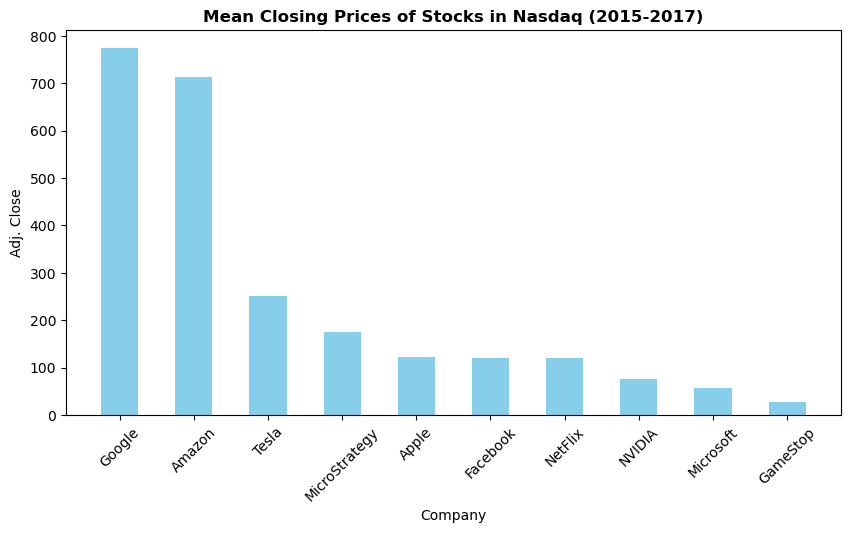

In [127]:
# Group the data by stock and calculate the mean closing price for each stock
closing_prices = Nasdaq_data.groupby('Company')['Adj. Close'].mean()

# Sort the closing prices from highest to lowest
closing_prices = closing_prices.sort_values(ascending=False)

# Plot the closing prices for each stock
plt.figure(figsize=(10, 5)) # Set figure size
plt.bar(closing_prices.index, closing_prices.values, width=0.5, color='skyblue') # Decrease bar width
plt.xlabel('Company')
plt.ylabel('Adj. Close')
plt.title('Mean Closing Prices of Stocks in Nasdaq (2015-2017)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45) # Rotate x-axis labels

# Save the figure with bbox_inches='tight'
plt.savefig("output_data/Fig1.png", bbox_inches='tight')

# Show plot
plt.show()

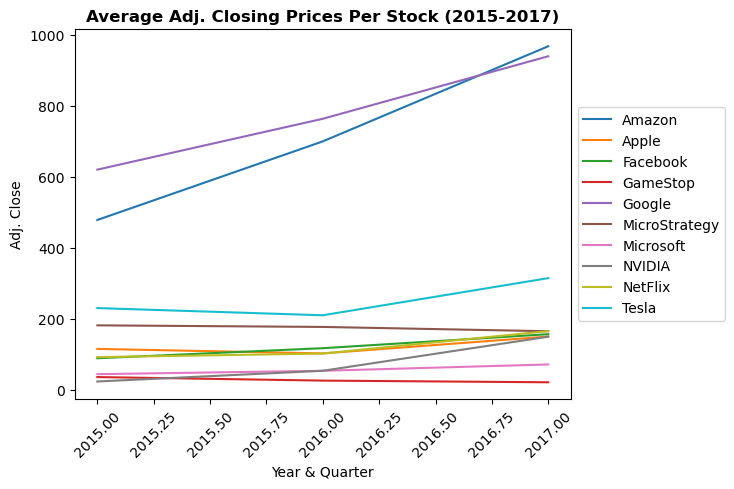

In [126]:
# Convert the date column to a datetime object
Nasdaq_data['Date'] = pd.to_datetime(Nasdaq_data['Date'])

# Extract year from the date column
Nasdaq_data['Year'] = Nasdaq_data['Date'].dt.year

# Group the data by year and stock symbol and calculate the mean closing price for each stock
closing_prices = Nasdaq_data.groupby([Nasdaq_data['Date'].dt.year, 'Company'])['Adj. Close'].mean()

# Pivot the data to create a new dataframe with years as rows, stocks as columns, and closing prices as values
closing_prices_pivot = closing_prices.reset_index().pivot(index='Date', columns='Company', values='Adj. Close')

# Plot the closing prices for each stock as they relate to years
ax = closing_prices_pivot.plot(kind='line')
ax.set_title('Average Adj. Closing Prices Per Stock (2015-2017)', fontsize=12, fontweight='bold')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Year & Quarter')
plt.ylabel('Adj. Close')
plt.xticks(rotation=45)

# Save the figure with bbox_inches='tight'
plt.savefig("output_data/Fig2.png", bbox_inches='tight')

# Show plot
plt.show()


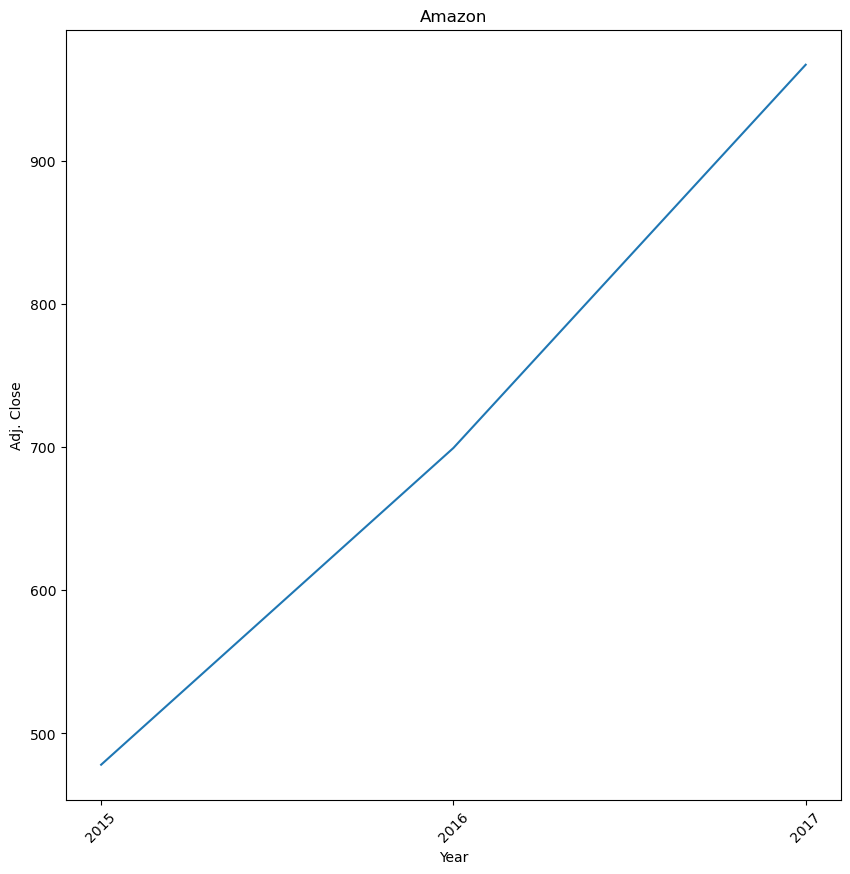

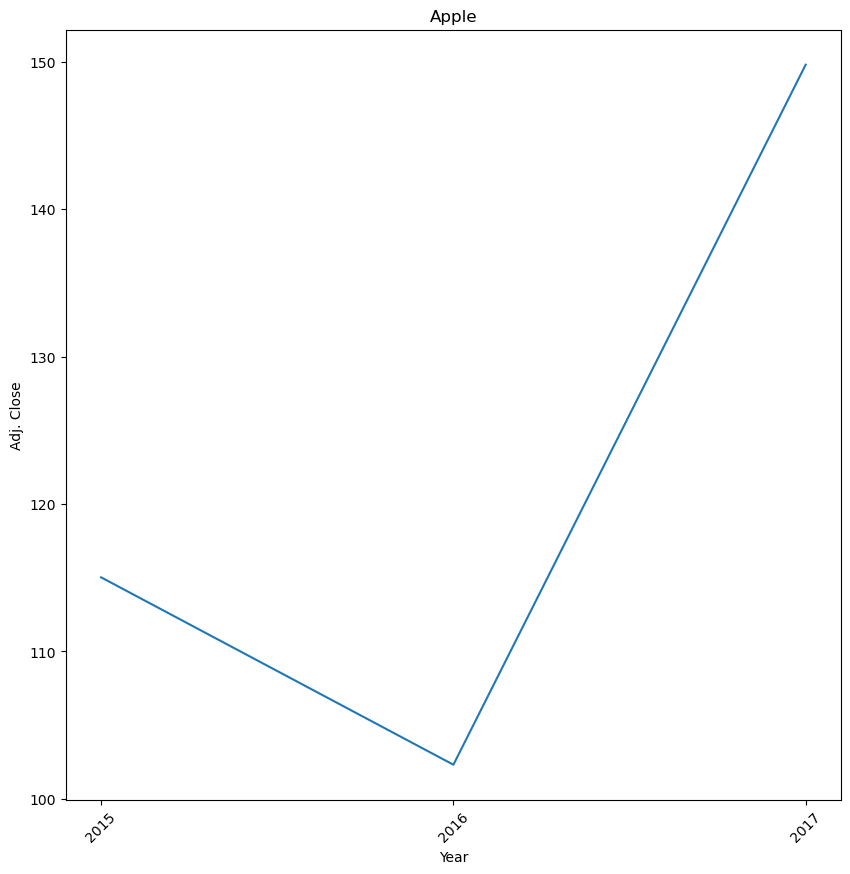

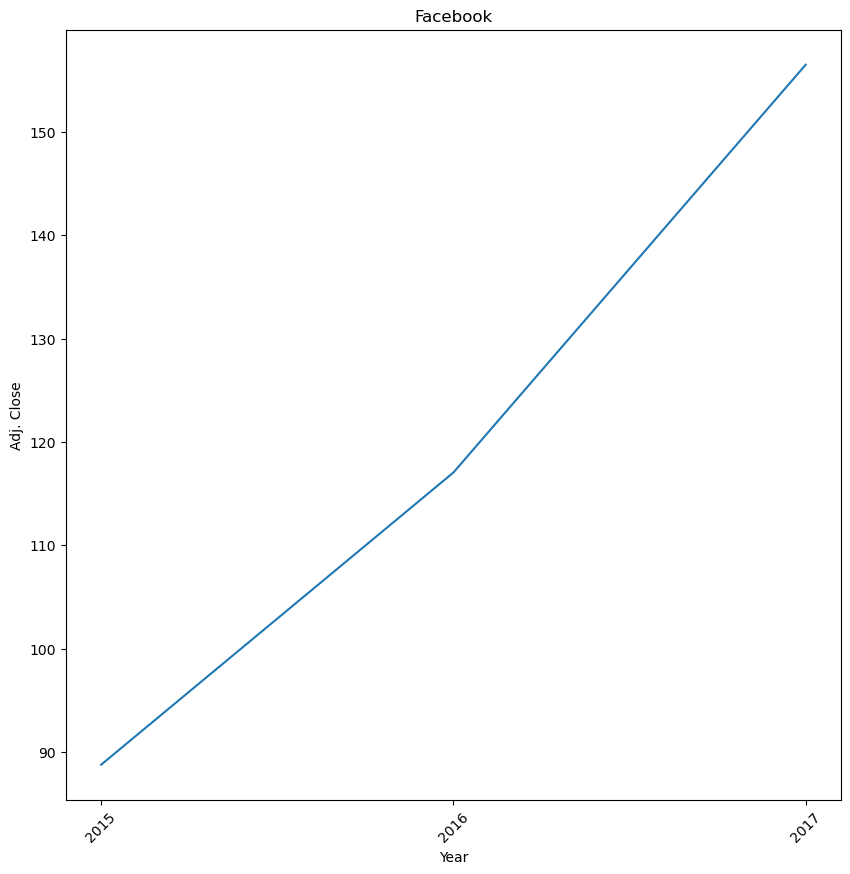

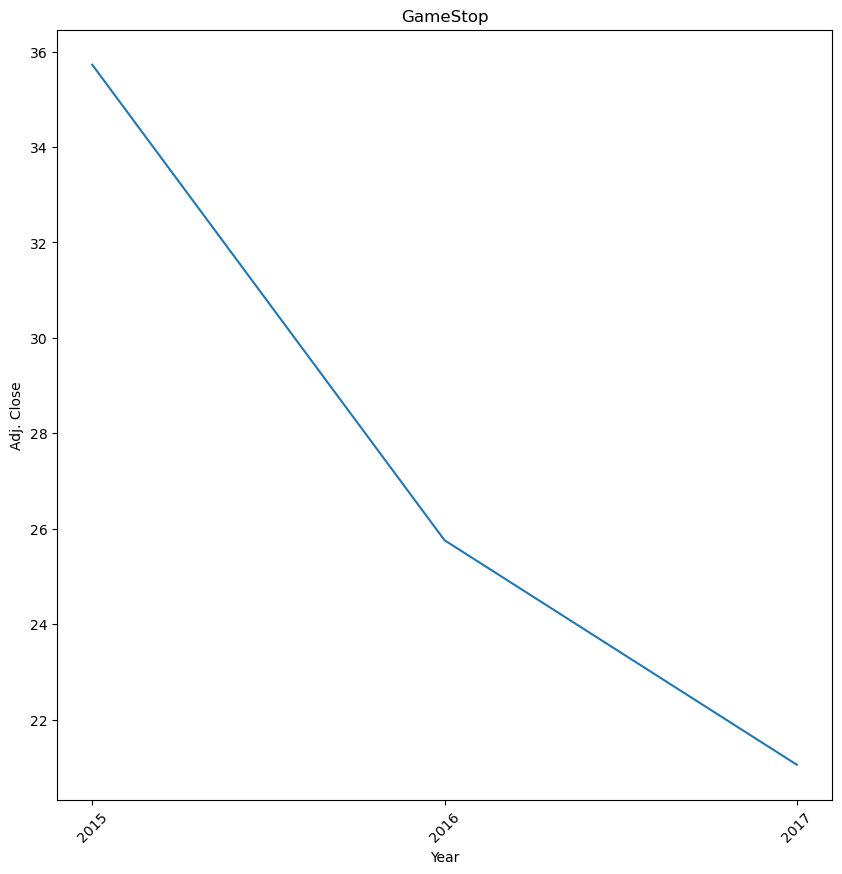

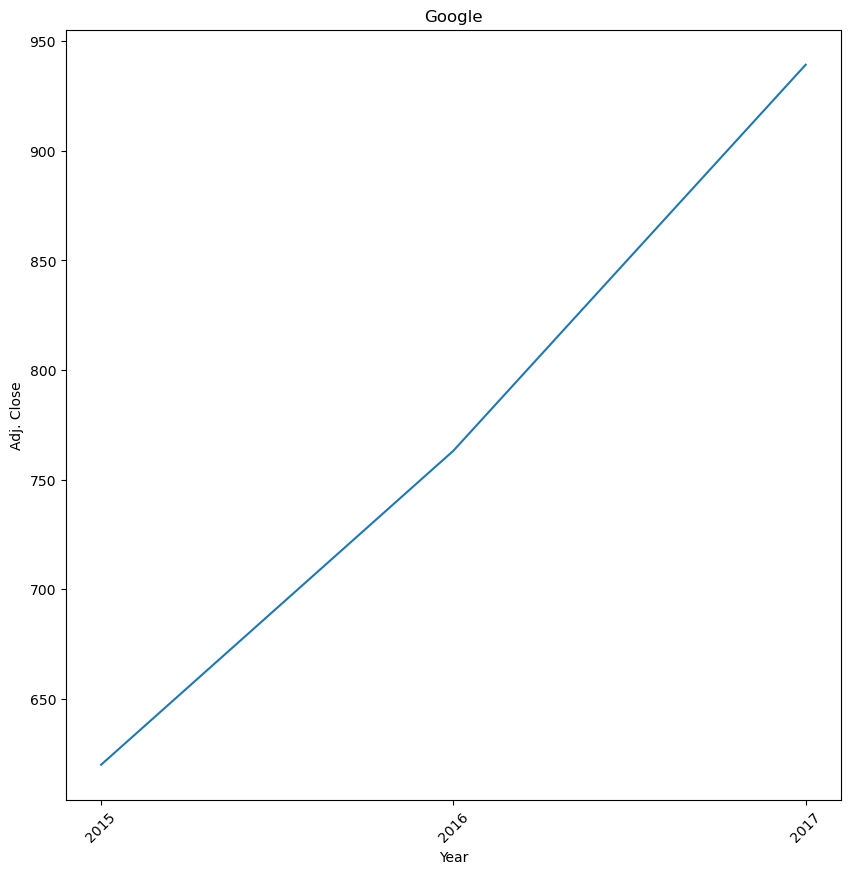

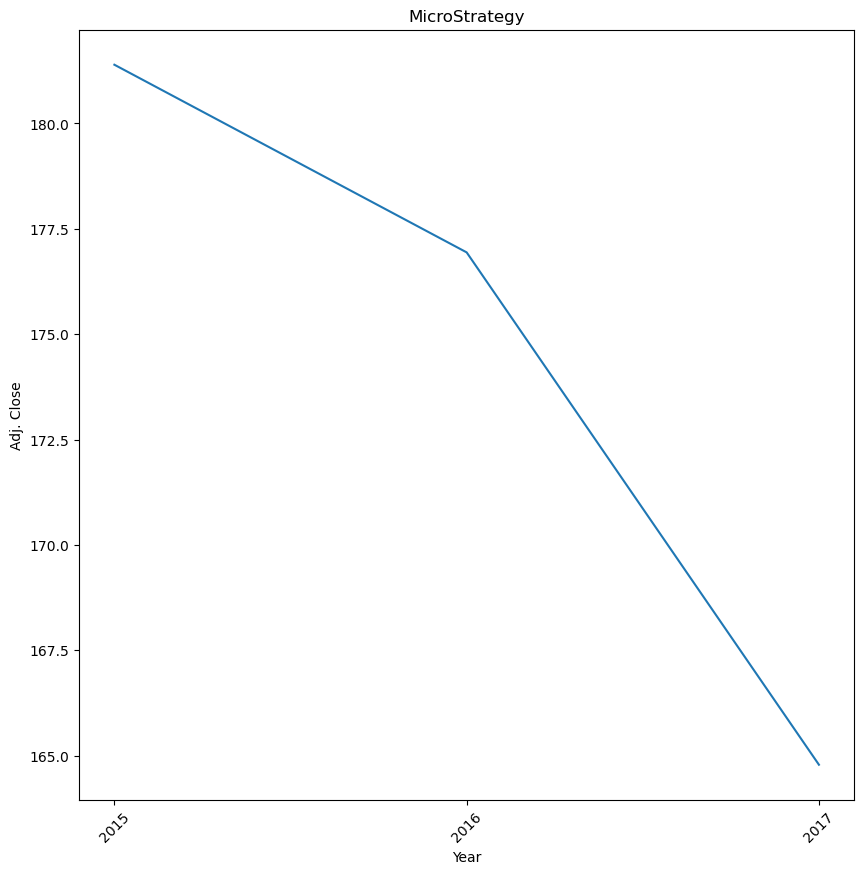

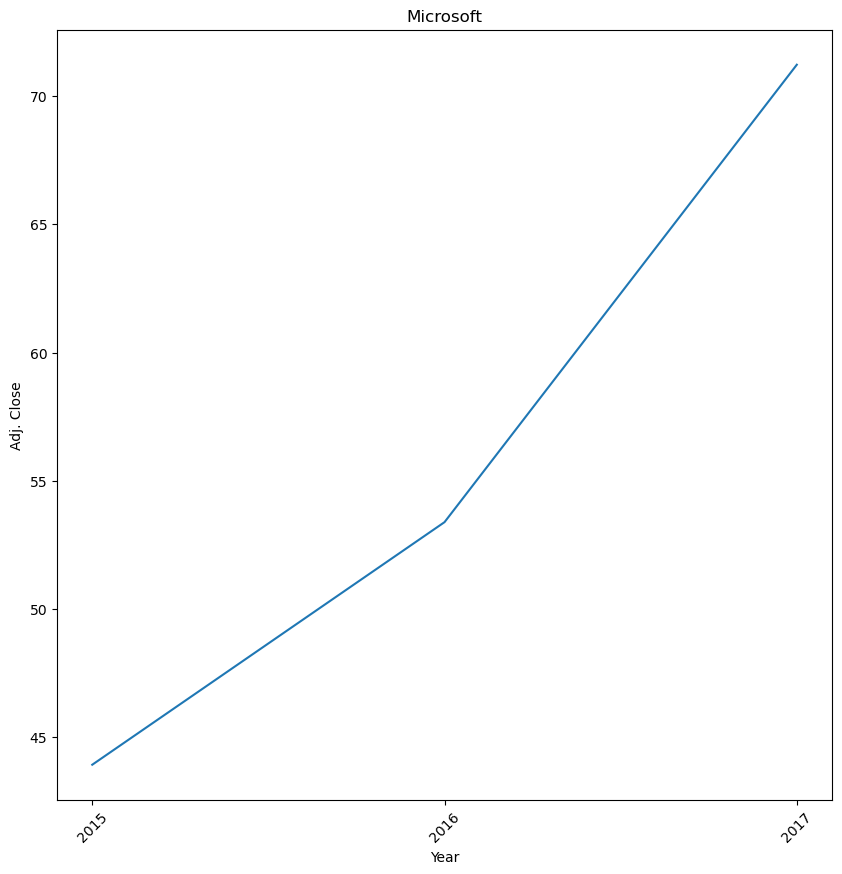

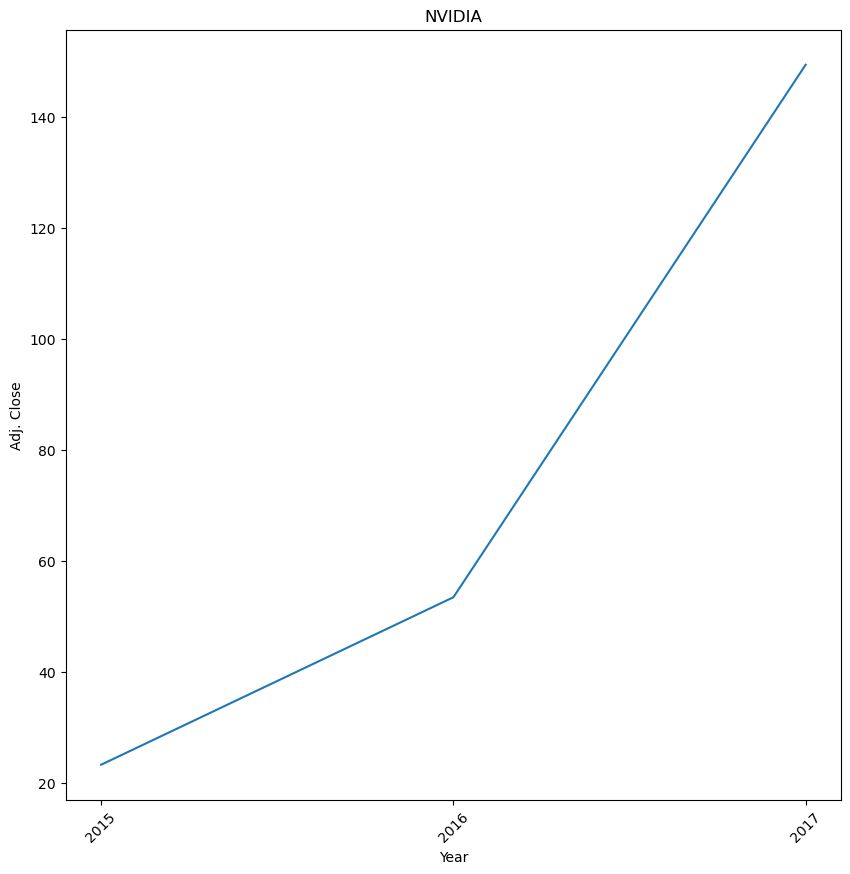

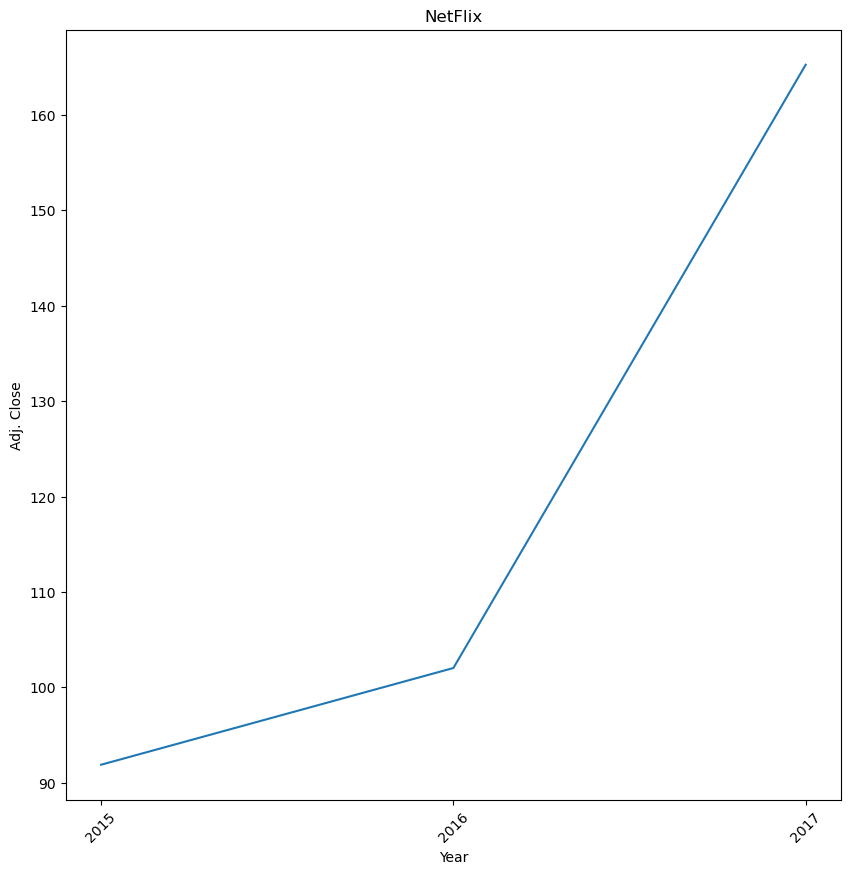

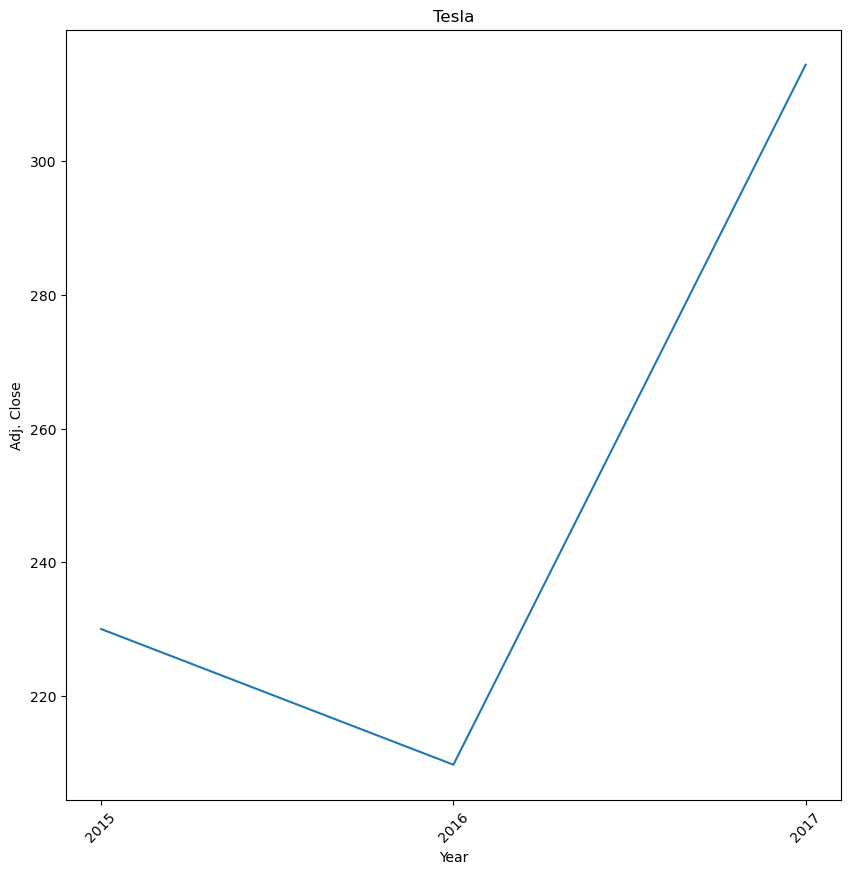

In [107]:
# Group the data by year and stock symbol and calculate the mean closing price for each stock
closing_prices = Nasdaq_data.groupby([Nasdaq_data['Date'].dt.year, 'Company'])['Adj. Close'].mean()

# Pivot the data to create a new dataframe with stocks as rows, years as columns, and closing prices as values
closing_prices_pivot = closing_prices.reset_index().pivot(index='Company', columns='Date', values='Adj. Close')

# Plot the closing prices for each stock as they relate to years
for stock in closing_prices_pivot.index:
    if not closing_prices_pivot.loc[stock].isnull().all():
        fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
        axs.plot(closing_prices_pivot.loc[stock])
        axs.set_xlabel('Year')
        axs.set_ylabel('Adj. Close')
        axs.set_title(stock)
        axs.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
        plt.xticks(rotation=45)

        # Save the figure with bbox_inches='tight'
        plt.savefig(f"output_data/Fig3_{stock}.png", bbox_inches='tight')

        # Show plot
        plt.show()



The above charts show the total average adjusted closing price, and the upward, downward, or sideways trends of each company for the period of 2015-2017.  
This data shows the average closing price for Google and Amazon are significantly higher than the other compared stock prices, as well as their upward trajectory throughout the time period.  This indicates that both companies have been performing well in the stock market during the given period. However, it is important to note that past performance does not guarantee future results. Therefore, it is crucial to consider other factors such as market trends, company financials, and global events that could impact the stock prices.


# Volatility Analysis: Calculate the standard deviation of daily returns for each stock to understand its volatility. A higher standard deviation indicates higher volatility, which can imply greater risk or potential reward.


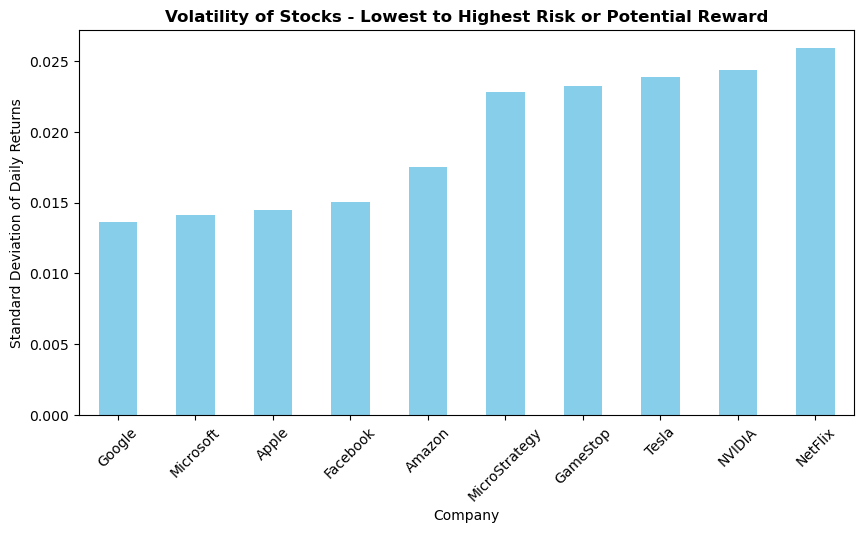

In [125]:
# Group the data by year and stock symbol and calculate the mean closing price for each stock
closing_prices = Nasdaq_data.groupby([Nasdaq_data['Date'].dt.year, 'Company'])['Adj. Close'].mean()

# Pivot the data to create a new dataframe with stocks as rows, years as columns, and closing prices as values
closing_prices_pivot = closing_prices.reset_index().pivot(index='Company', columns='Date', values='Adj. Close')

# Calculate the standard deviation of daily returns for each stock
daily_returns = Nasdaq_data.groupby('Company')['Adj. Close'].pct_change()
std_dev = daily_returns.groupby(Nasdaq_data['Company']).std()

# Sort the standard deviation of daily returns for each stock from least volatile to greatest
std_dev_sorted = std_dev.sort_values(ascending=True)

# Plot the standard deviation of daily returns for each stock
plt.figure(figsize=(10, 5)) # Set figure size
ax = std_dev_sorted.plot(kind='bar', color='skyblue')
ax.set_xlabel('Company')
ax.set_ylabel('Standard Deviation of Daily Returns')
ax.set_title('Volatility of Stocks - Lowest to Highest Risk or Potential Reward', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)

# Save the figure with bbox_inches='tight'
plt.savefig(f"output_data/Fig4.png", bbox_inches='tight')
        
# Show plot
plt.show()

    # Apple
    # Amazon
    # Facebook
    # GameStop
    # Google
    # Microsoft
    # MicroStrategy
    # NetFlix
    # NVIDIA
    # Tesla

# Comparative Return Analysis: Compute the total returns for each stock over the three-year period. This can help in comparing which stocks provided the best return on investment.

In [93]:
# # Read the Nasdaq Stock data set
# Nasdaq_data = pd.read_csv('Main.csv')
# Nasdaq_data.head()

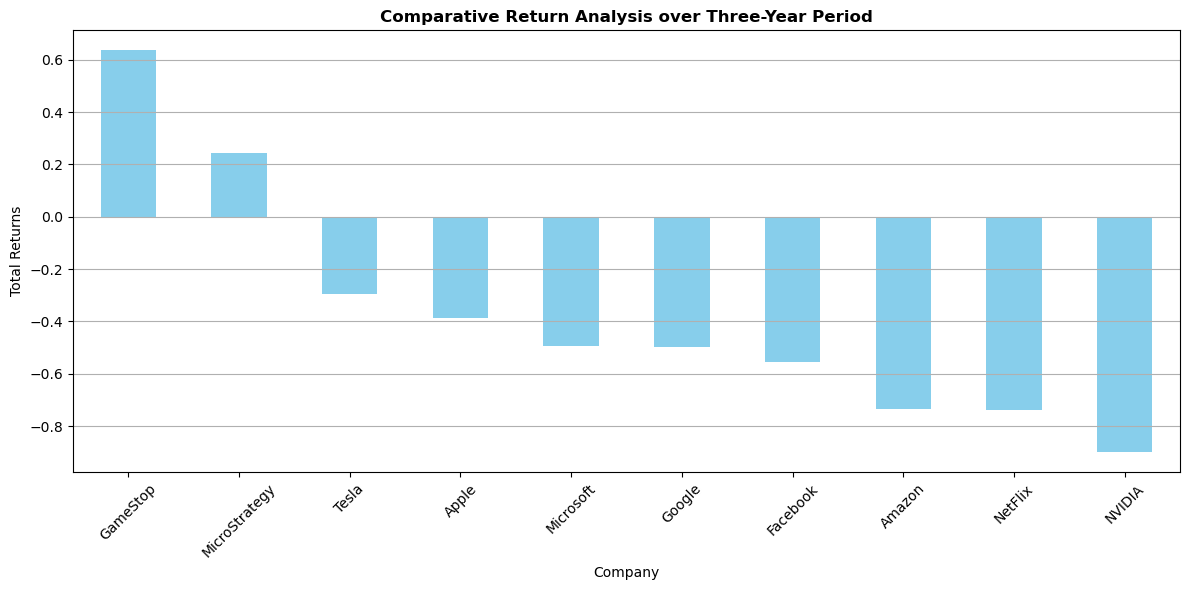

In [124]:
# Ensure 'Date' column is of datetime type
Nasdaq_data['Date'] = pd.to_datetime(Nasdaq_data['Date'])

# Calculate the daily returns for each stock
Nasdaq_data['Daily Returns'] = Nasdaq_data.groupby('Company')['Adj. Close'].pct_change()

# Calculate the total returns for each stock over the three-year period
Nasdaq_data['Total Returns'] = (1 + Nasdaq_data['Daily Returns']).groupby(Nasdaq_data['Company']).cumprod().fillna(1)

# Get the final total return for each stock
final_total_returns = Nasdaq_data.groupby('Company')['Total Returns'].last() - 1  # subtract 1 to get the net return

# Sort stocks by their final total returns
sorted_returns = final_total_returns.sort_values(ascending=False)

# Plotting the total returns
plt.figure(figsize=(12, 6))
sorted_returns.plot(kind='bar', color='skyblue')
plt.title('Comparative Return Analysis over Three-Year Period', fontsize=12, fontweight='bold')
plt.ylabel('Total Returns')
plt.xlabel('Company')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')

# Save the figure with bbox_inches='tight'
plt.savefig(f"output_data/Fig5.png", bbox_inches='tight')

plt.show()

The "Comparative Return Analysis over Three-Year Period" chart visually compares the performance of different company stocks over three years. The Y-axis represents the percentage change in stock value, with bars extending upwards indicating profit and downwards indicating a loss. For instance, GameStop showed a remarkable 60% positive return, translating to a 160 dollar value on a 100 dollar investment, while NVIDIA faced a steep 80% drop, leaving a mere 20 dollars from a 100 dollar investment. The chart succinctly captures the profit or loss magnitude for each company over the specified period.